### Deep Learning Course

2021/2022
***
Gonçalo Faria, André Martins
***
# Principal Component Analysis and Autoencoders

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
%matplotlib inline

### Question 1.8

We will implement PCA with the following training data:

$\mathbf{x} =\begin{bmatrix} 1, 0, 1, 0 \end{bmatrix}$
$
\mathbf{x}^{(1)}=\begin{bmatrix}
2.5\\
2.4\\
\end{bmatrix}, \quad \mathbf{x}^{(2)}=\begin{bmatrix}
0.5\\
0.7\\
\end{bmatrix}, \quad \mathbf{x}^{(3)}=\begin{bmatrix}
2.2\\
2.9\\
\end{bmatrix}, \quad \mathbf{x}^{(4)}=\begin{bmatrix}
1.9\\
2.2\\
\end{bmatrix}
$

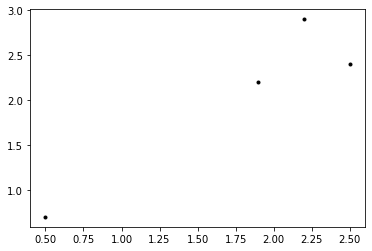

In [2]:
X = np.array([[2.5,2.4],[ 0.5, 0.7],[2.2, 2.9],[1.9,2.2]])

plt.plot(X[:, 0], X[:, 1], 'k.')
plt.show()

❓ Compute the covariance matrix and eigenvectors from the data

In [3]:
X = np.array([[2.5,2.4],[ 0.5, 0.7],[2.2, 2.9],[1.9,2.2]])

# compute the covariance matrix C
# Your code here
column_means = np.mean(X, axis=0)
Z = X - column_means
C = np.dot(Z.T,Z)

# compute the eigenvalues and eigenvectors 
## HINT: use the function from np.linalg : `np.linalg.eig()'
# Your code here
eigen_value, eigen_vector = np.linalg.eig(C)

print(eigen_value)
print(eigen_vector)


[0.15753176 4.87996824]
[[-0.73229984 -0.68098233]
 [ 0.68098233 -0.73229984]]


❓ What is the first principal component? 

In [4]:
# Your code here
max_component = np.argmax(eigen_value)
principal_component = eigen_vector[:,max_component]
print(max_component)
print(principal_component)

1
[-0.68098233 -0.73229984]


❓ Reduce the dimensionality of the training data by mapping the points onto the principal component

❓ Find the orthogonal projection of the data onto the first principal component’s subspace in the original coordinates.

In [5]:
# Your code here
Y = np.dot(X, principal_component)
print(Y)

[-3.45997546 -0.85310106 -3.62183068 -2.90492609]


In [6]:
P = np.outer(principal_component, principal_component.T)
mapped_X = np.dot(X, P)
print(P)
print(mapped_X)

[[0.46373694 0.49868326]
 [0.49868326 0.53626306]]
[[2.35618216 2.53373949]
 [0.58094675 0.62472577]
 [2.46640271 2.65226604]
 [1.97820335 2.12727692]]


❓ What is the mean squared error of the projected training data?

In [7]:
MSE = np.sum( 
    ( mapped_X - X )**2 
) /4

print(f" MSE : {MSE}")

 MSE : 0.04863383382534045


Now let's plot everything

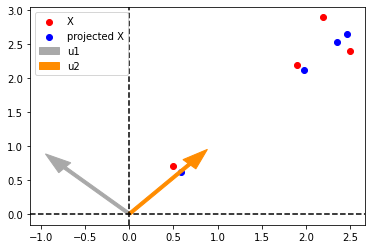

In [8]:
# plot
# data scatter
plt.scatter(X[:,0],X[:,1],color="red", label="X")

# projected scatter
plt.scatter(mapped_X[:,0],mapped_X[:,1],color="blue", label="projected X")


plt.arrow(0,0,eigen_vector[0,0],eigen_vector[1,0],
          head_width=0.2,width=0.04,head_length=0.3, color="darkgrey", label="u1")

plt.arrow(0,0, -eigen_vector[0,1], -eigen_vector[1,1],
          head_width=0.2,width=0.04,head_length=0.3, color="darkorange", label="u2")

# axis and legend
plt.axhline(0,color="black", linestyle="--")
plt.axvline(0,color="black", linestyle="--")
plt.legend()
plt.show()

### Applications : Image Denoising
Loading digits data and corrupting them with gaussian noise.

In [9]:
# Loading data and applying gaussian noise. 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_digits
data = load_digits()

X, y = data.data, data.target
# normalize images.
X = MinMaxScaler().fit_transform(X)  

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=0, train_size=1697, test_size=100
)

## applying gaussian noise
rng = np.random.RandomState(0)
noise = rng.normal(scale=0.25, size=X_test.shape)

X_test_noisy = X_test + noise

noise = rng.normal(scale=0.25, size=X_train.shape)
X_train_noisy = X_train + noise

Displaying the corrupted and uncorrupted images. 

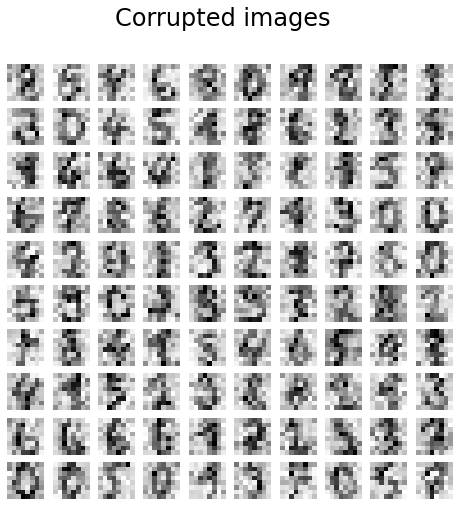

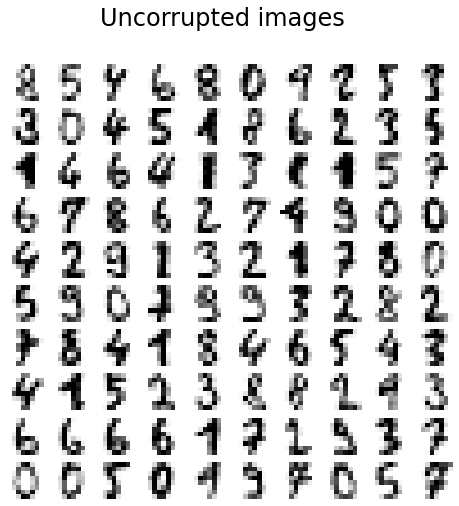

In [10]:
def plot_digits(X, title):
    """Small helper function to plot 100 digits."""
    fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(8, 8))
    for img, ax in zip(X, axs.ravel()):
        ax.imshow(img.reshape((8, 8)), cmap="Greys")
        ax.axis("off")
    fig.suptitle(title, fontsize=24)
    
plot_digits(
    X_test_noisy, f"Corrupted images\n"
)

plot_digits(
    X_test,
    "Uncorrupted images",
)

#### Using PCA

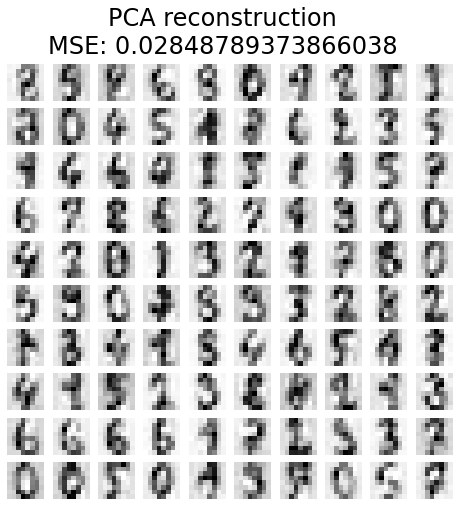

In [11]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
# Your code here
# implement PCA here using the functions from sklearn

n_components = 14  # Number of principal components to keep
pca = PCA(n_components=n_components)

# Step 2: Fit the PCA model to the data
pca.fit(X_train_noisy)

# Step 3: Transform and Reconstruct
X_reduced = pca.transform(X_test_noisy)  # Project data to the reduced space
X_reconstructed_pca = pca.inverse_transform(X_reduced)  # Reconstruct data from reduced space

# Step 4: Compute Reconstruction Loss (MSE)
MSE_test = mean_squared_error(X_test, X_reconstructed_pca)

plot_digits(
    X_reconstructed_pca,
    f"PCA reconstruction\nMSE: {MSE_test}",
)

In [12]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt\
import numpy as np
from sklearn.datasets import load_digits

# Initialize PCA
n_components_list = [1, 5, 10, 20, 40, 64]  # Test different numbers of components

# For storing results
reconstructions = []
mse_list = []

for n_components in n_components_list:
    # Fit PCA
    pca = PCA(n_components=n_components)
    pca.fit(X_train_noisy)
    
    # Project onto reduced space
    X_reduced = pca.transform(X_test_noisy)
    
    # Reconstruct data
    X_reconstructed = pca.inverse_transform(X_reduced)
    reconstructions.append(X_reconstructed)
    
    # Calculate reconstruction error
    mse = mean_squared_error(X_test, X_reconstructed)
    mse_list.append(mse)

# Display reconstruction results for 1st principal component
pca_first = PCA(n_components=1)
pca_first.fit(X_train_noisy)
X_reduced_first = pca_first.transform(X_test_noisy)
X_reconstructed_first = pca_first.inverse_transform(X_reduced_first)

# Plot original images vs. projections on the first principal component
def plot_comparison(original, reconstructed, title):
    fig, axes = plt.subplots(2, 10, figsize=(15, 5))
    for i in range(10):
        # Original images
        axes[0, i].imshow(original[i].reshape(8, 8), cmap='gray')
        axes[0, i].axis('off')
        # Reconstructed images
        axes[1, i].imshow(reconstructed[i].reshape(8, 8), cmap='gray')
        axes[1, i].axis('off')
    plt.suptitle(title)
    plt.show()

# Show the first component reconstruction
plot_comparison(
    X[:10], 
    X_reconstructed_first[:10], 
    "Reconstruction using 1st Principal Component"
)

# Plot reconstruction error vs. number of components
plt.plot(n_components_list, mse_list, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Reconstruction MSE")
plt.title("Reconstruction Error vs. Number of Principal Components")
plt.show()


SyntaxError: invalid syntax (2605457352.py, line 4)

#### Using an Autoencoder
Model definition.

In [ ]:
from torch import nn
from torch import optim
import torch

# implement an MLP class in pytorch as a module to be used for the autoencoder components
# use ReLU activations

class MLP(nn.Module):
    # Your code here
    def __init__(self, input_size, hidden_sizes, output_size, encoder, activation=nn.ReLU()):
        super(MLP, self).__init__()
        # Your code here
        self.layers = nn.ModuleList()
        self.activations = nn.ModuleList()
        self.n_layers = len(hidden_sizes)
        self.encoder = encoder
        
        # input layer
        self.layers.append(nn.Linear(input_size, hidden_sizes[0]))
        self.activations.append(activation)
        self.layers.append(nn.Linear(hidden_sizes[0], hidden_sizes[1]))
        self.activations.append(activation)
        self.layers.append(nn.Linear(hidden_sizes[1], output_size))
        if encoder:
            self.activations.append(activation)
        
    def forward(self, x):
        # Your code here
        for i in range(self.n_layers):
            x = self.layers[i](x)
            x = self.activations[i](x)
        x = self.layers[-1](x)
        if self.encoder:
            x = self.activations[-1](x)
        return x
    
# implement the autoencoder class
class Autoencoder(nn.Module):
    # implement the initialisation function
    def __init__(self, 
                latent_size=14,
                encoder_dims=[32,32],
                decoder_dims=[32,32],
                input_size=64,
                activation = nn.ReLU()
                ):
        super(Autoencoder,self).__init__()
        
        # your code here
        self.encoder = MLP(input_size, encoder_dims, latent_size, 1, activation)
        self.decoder = MLP(latent_size, decoder_dims, input_size, 0, activation)
        
    # now implement the forward
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    # your code here

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
totensor = lambda x : torch.from_numpy(x).float().to(device)

We instantiate the model, creating the data tensor, sending it to the device, defining the loss function, and optimizer. 

In [ ]:
# implement the train function 

def train(
    model,
    X_train_noisy,
    epochs=20000,
    lr=4e-3
):
    
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    model = model.to(device)

    X_train = totensor(X_train_noisy)
    
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, epochs-1, eta_min=1e-8)
    
    criterion = nn.MSELoss()
    
    losses=[]

    model.train()

    # specify the steps for every epoch
    # Your code here
    
    for _ in range(epochs):
        # Your code here
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, X_train)
        loss.backward()
        optimizer.step()
        scheduler.step()
        losses.append(loss.item())
    
    return losses
    

In [ ]:
def test(model,
        X_test_noisy,
        X_test):
    
    model.eval()
    with torch.no_grad():
        reconstructed_test_ae = model(totensor(X_test_noisy)).cpu().numpy()
        MSE_test = np.mean((X_test - reconstructed_test_ae) ** 2)

    plot_digits(
        reconstructed_test_ae,
        f"Autoencoder reconstruction\nMSE: {MSE_test}",
    )

#### Autoencoder with linear activation function.

Autoencoder(
  (encoder): MLP(
    (layers): ModuleList(
      (0): Linear(in_features=64, out_features=32, bias=True)
      (1): Linear(in_features=32, out_features=32, bias=True)
      (2): Linear(in_features=32, out_features=14, bias=True)
    )
    (activations): ModuleList(
      (0-2): 3 x Identity()
    )
  )
  (decoder): MLP(
    (layers): ModuleList(
      (0): Linear(in_features=14, out_features=32, bias=True)
      (1): Linear(in_features=32, out_features=32, bias=True)
      (2): Linear(in_features=32, out_features=64, bias=True)
    )
    (activations): ModuleList(
      (0-1): 2 x Identity()
    )
  )
)


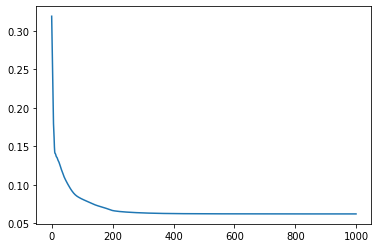

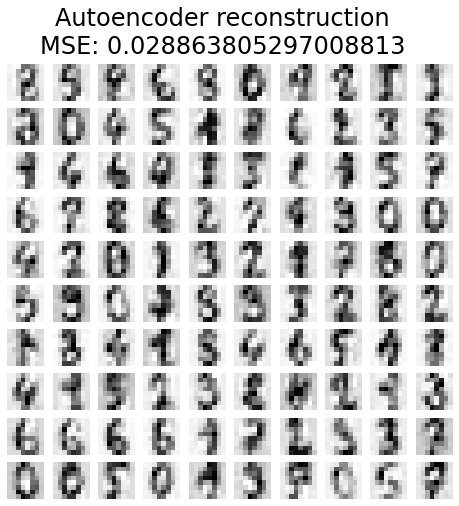

In [ ]:
model = Autoencoder(
    latent_size=14,
    encoder_dims=[32,32],
    decoder_dims=[32,32],
    input_size=64,
    activation=nn.Identity()
)

print(model)

losses = train(
    model=model,
    X_train_noisy=X_train_noisy,
    epochs=1000,
    lr=4e-3
)

plt.plot(losses)

test(model,
    X_test_noisy,
    X_test)

#### Autoencoder with non-linear activation function.

Autoencoder(
  (encoder): MLP(
    (layers): ModuleList(
      (0): Linear(in_features=64, out_features=32, bias=True)
      (1): Linear(in_features=32, out_features=32, bias=True)
      (2): Linear(in_features=32, out_features=3, bias=True)
    )
    (activations): ModuleList(
      (0-2): 3 x ReLU()
    )
  )
  (decoder): MLP(
    (layers): ModuleList(
      (0): Linear(in_features=3, out_features=32, bias=True)
      (1): Linear(in_features=32, out_features=32, bias=True)
      (2): Linear(in_features=32, out_features=64, bias=True)
    )
    (activations): ModuleList(
      (0-1): 2 x ReLU()
    )
  )
)


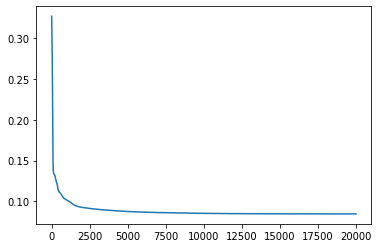

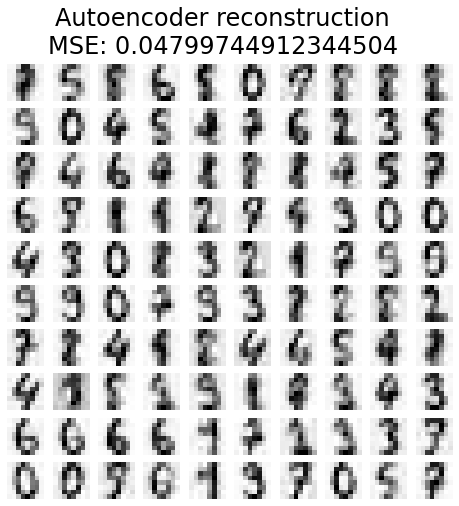

In [ ]:
model = Autoencoder(
    latent_size=3,
    encoder_dims=[32,32],
    decoder_dims=[32,32],
    input_size=64,
    activation=nn.ReLU()
)

print(model)

losses = train(
    model=model,
    X_train_noisy=X_train_noisy,
    epochs=20000,
    lr=4e-4
)

plt.plot(losses)
plt.show()

test(model,
    X_test_noisy,
    X_test)

The size of the lower-dimensional subspace is significantly smaller with the autoencoder; however, the qualitative results are good. We encourage you to test different activation functions, number of epochs, bottleneck size, and network topology.

## Vizualizing the latent space

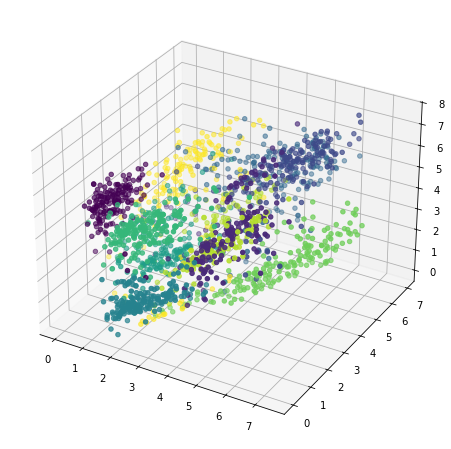

In [ ]:
with torch.no_grad():
    latents = model.encoder(totensor(X_train)).cpu().numpy()
    
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')
ax.scatter3D(latents[:,0],latents[:,1], latents[:,2], c=y_train);

Note that the latent space contains clusters pretaining to each of the class labels.